<h1>MH</h1>

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Charger les données
train = pd.read_csv("traindat.txt", delimiter=r"\s+", header=0)
test = pd.read_csv("Testdat.txt", delimiter=r"\s+", header=0)
data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [2]:
# Séparer les features et la cible
y = data["y"]
X = data.drop(columns=["y"])

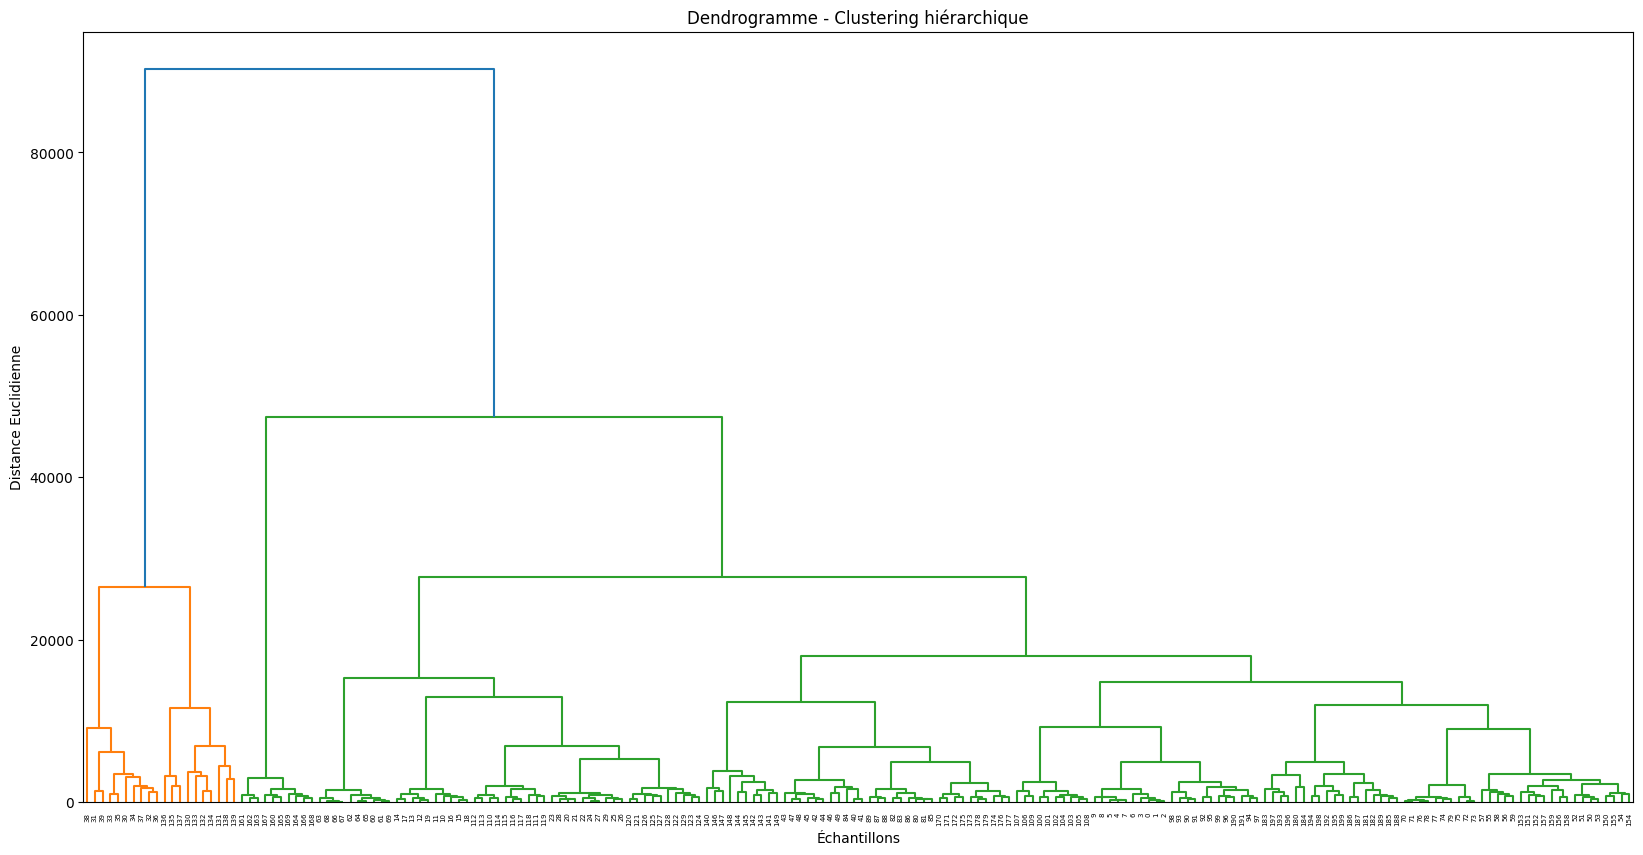

In [3]:
# Tracer le dendrogramme
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Échantillons")
plt.ylabel("Distance Euclidienne")
plt.show()

Analyse détaillée du dendrogramme :
Observation de la plus grande hauteur verticale entre deux fusions :

Il y a une très grande cassure vers 90 000, où deux gros groupes sont fusionnés en un seul.

Ensuite, un autre grand saut apparaît autour de 40 000 à 50 000, puis plusieurs petites fusions en dessous.

Méthode du coude appliquée au dendrogramme :

L’idée est de tracer une ligne horizontale un peu avant la plus grande cassure pour capturer les groupes naturels avant qu’ils soient fusionnés de force.

Si on trace une ligne à environ 45 000, on voit qu’on coupe environ 4 grandes branches.



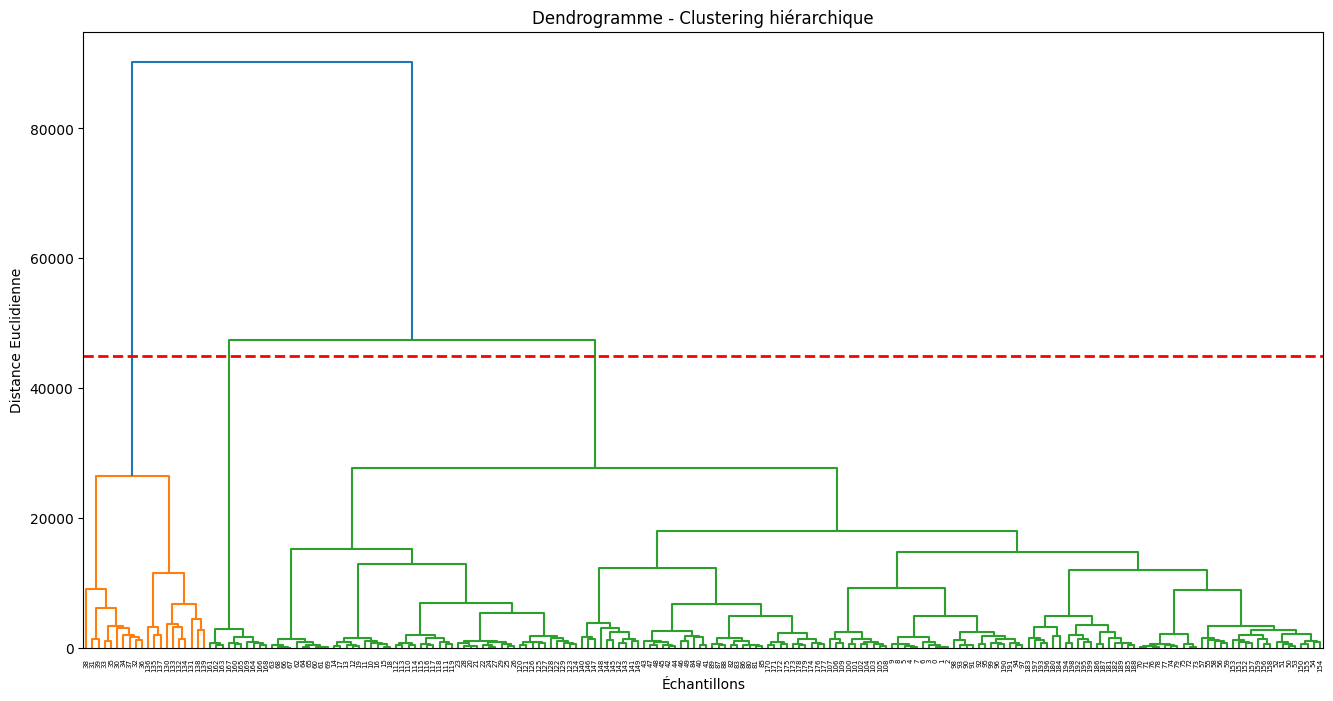

In [4]:
# Tracer le dendrogramme
plt.figure(figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Tracer la ligne horizontale à une certaine hauteur (ici 45000)
plt.axhline(y=45000, color='red', linestyle='--', linewidth=2)

plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Échantillons")
plt.ylabel("Distance Euclidienne")
plt.show()


In [5]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer le clustering hiérarchique avec 4 clusters
model = AgglomerativeClustering(n_clusters=4, linkage='ward')  
clusters = model.fit_predict(X)

# Ajouter les résultats au DataFrame
data["cluster"] = clusters

# Afficher les premières lignes
print(data.head())


   y    m00         mu02        mu11         mu20        mu03         mu12  \
0  a  119.0  1164.571429  -84.000000  2274.705882 -728.448980 -1026.235294   
1  a  124.0  1205.870968  -30.129032  2439.120968 -703.298647 -1067.540583   
2  a  123.0  1167.365854  -47.073171  2372.747967 -531.112433 -1078.021416   
3  a  131.0  1288.229008  -13.320611  2523.648855 -480.553814 -1266.542218   
4  a  133.0  1385.879699 -148.030075  2644.992481 -613.045395 -1565.516988   

         mu21         mu30  cluster  
0 -308.016807  2446.878893        1  
1 -395.008325  2494.423127        1  
2 -452.984335  2438.033181        1  
3 -219.485170  2209.729619        1  
4 -251.322856  2869.338459        1  


In [6]:
# afficher le nombre d'échantillons dans chaque cluster
print(data["cluster"].value_counts())

cluster
1    120
3     50
0     20
2     10
Name: count, dtype: int64


Le cluster 1 domine fortement le dataset avec la majorité des échantillons.

Les clusters 0 et 2 sont très petits, ce qui pourrait indiquer des groupes rares ou des outliers (valeurs atypiques).


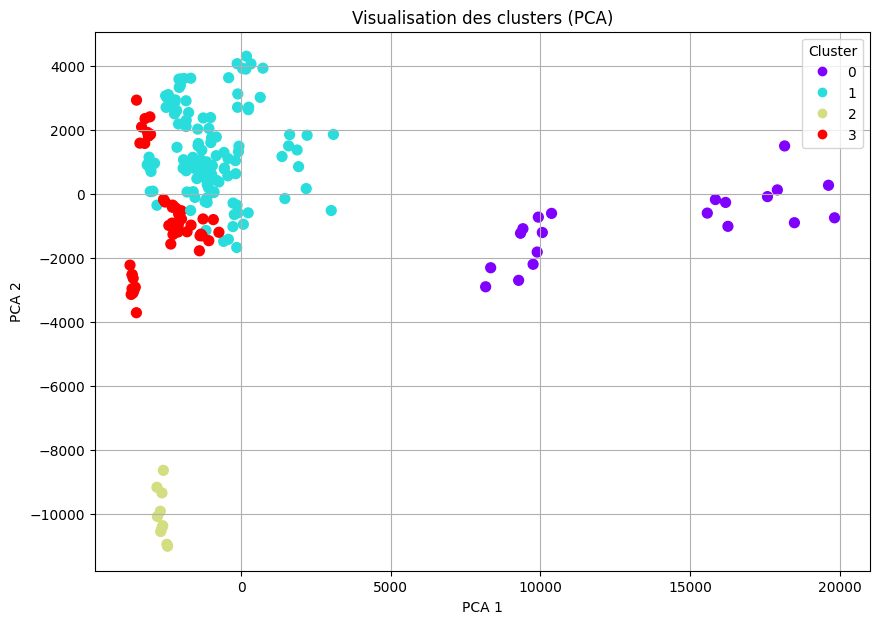

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire à 2 dimensions pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tracer les clusters en 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title("Visualisation des clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()


Cluster 1 (cyan) – 🔵

Très dense, avec beaucoup de points regroupés.

Il occupe principalement le centre du nuage de points.

C’est le plus grand cluster (120 éléments).

Peut représenter une classe dominante ou une structure principale dans les données.

Cluster 3 (rouge) – 🔴

Très proche du cluster cyan, mais formant une masse plus petite à gauche.

Il pourrait s’agir d’un sous-groupe structurellement différent mais proche du cluster 1.

Comporte 50 points, donc un groupe significatif.

Cluster 0 (violet) – 🟣

Éloigné vers la droite sur la composante PCA1.

Bien séparé des autres, ce qui montre une différence nette dans les caractéristiques.

Cela confirme un groupe cohérent et distinct dans l’espace de caractéristiques.

20 éléments.

Cluster 2 (jaune clair) – 🟡

Complètement isolé, en bas à gauche du graphique.

Très petit (10 éléments), mais très bien séparé, donc peut-être un groupe atypique ou des outliers.

Visuellement très cohérent.

🧩 Ce que cela nous dit :
Le clustering hiérarchique a bien identifié des groupes naturellement séparés.

Certains clusters (0 et 2) sont clairement distincts, ce qui est un bon signe.

Cluster 3 et 1 sont plus proches, ils pourraient même être fusionnés dans une version plus simple à 3 groupes.

ajuster le critère de linkage

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer le clustering hiérarchique avec 4 clusters
model = AgglomerativeClustering(n_clusters=4, linkage='average')  
clusters = model.fit_predict(X)

# Ajouter les résultats au DataFrame
data["cluster"] = clusters

# Afficher les premières lignes
print(data.head())


   y    m00         mu02        mu11         mu20        mu03         mu12  \
0  a  119.0  1164.571429  -84.000000  2274.705882 -728.448980 -1026.235294   
1  a  124.0  1205.870968  -30.129032  2439.120968 -703.298647 -1067.540583   
2  a  123.0  1167.365854  -47.073171  2372.747967 -531.112433 -1078.021416   
3  a  131.0  1288.229008  -13.320611  2523.648855 -480.553814 -1266.542218   
4  a  133.0  1385.879699 -148.030075  2644.992481 -613.045395 -1565.516988   

         mu21         mu30  cluster  
0 -308.016807  2446.878893        3  
1 -395.008325  2494.423127        3  
2 -452.984335  2438.033181        3  
3 -219.485170  2209.729619        3  
4 -251.322856  2869.338459        3  


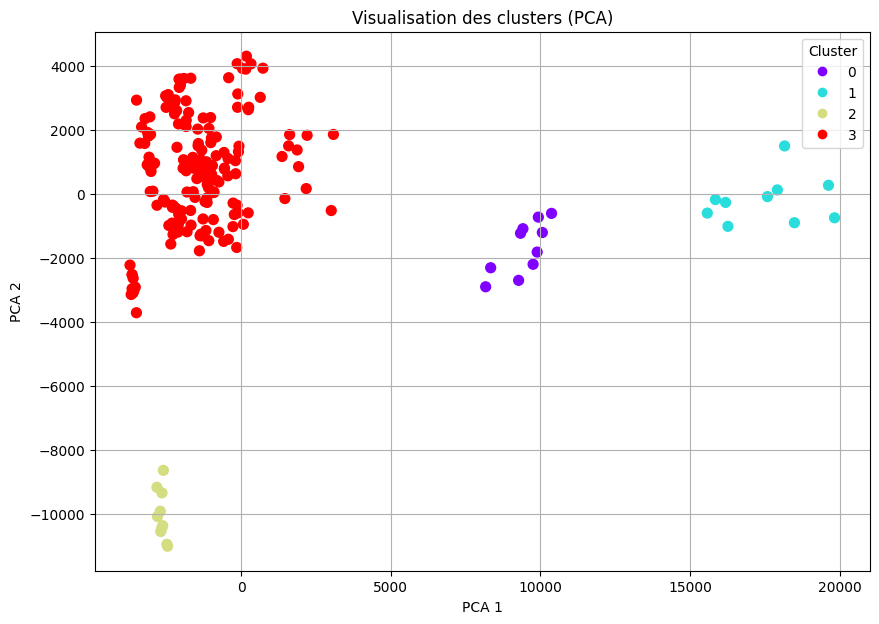

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire à 2 dimensions pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tracer les clusters en 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title("Visualisation des clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()


Cluster 3 (rouge) – 🔴

Très dense, avec beaucoup de points regroupés.

C’est le plus grand cluster .

Cluster 1 (cyan) – 🔵, Cluster 0 (violet) – 🟣, Cluster 2 (jaune clair) – 🟡

Sont complètement isolés.

Très petits , mais très bien séparés.

Visuellement très cohérent.

Ce que cela nous dit :
Le clustering hiérarchique a bien identifié des groupes séparés.


In [10]:


# Charger les données
train = pd.read_csv("traindat.txt", delimiter=r"\s+", header=0)
test = pd.read_csv("Testdat.txt", delimiter=r"\s+", header=0)
data = pd.concat([train, test], axis=0).reset_index(drop=True)

# Séparer les features et la cible
y = data["y"]
X = data.drop(columns=["y"])





In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [12]:
# Tester plusieurs valeurs de n_components
n_components_range = range(2, 15)
results = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    ari = adjusted_rand_score(y_encoded, y_pred)
    results.append((n, ari, y_pred))

# Résultat optimal
best_n, best_ari, best_pred = max(results, key=lambda x: x[1])
true_class_count = len(np.unique(y_encoded))

# Résultat pour n = nombre de classes réelles
gmm_10 = GaussianMixture(n_components=true_class_count, random_state=0)
gmm_10.fit(X)
y_pred_10 = gmm_10.predict(X)
ari_10 = adjusted_rand_score(y_encoded, y_pred_10)


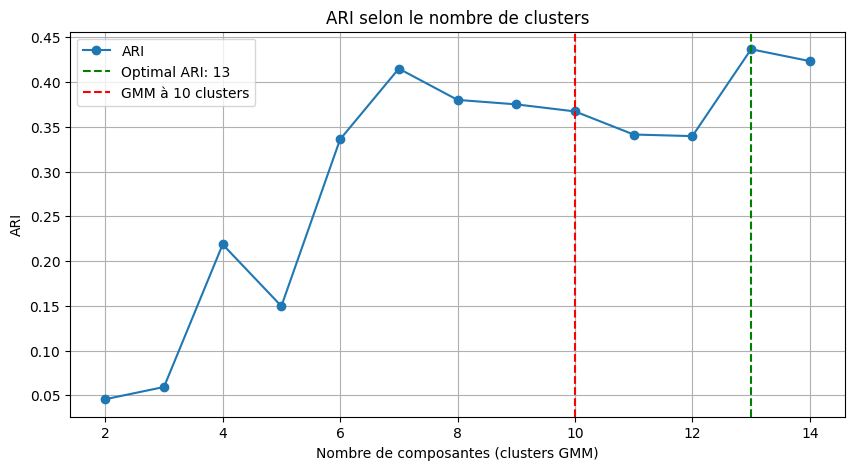

In [13]:

# ARI pour chaque n
ari_scores = [r[1] for r in results]

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, ari_scores, marker='o', label='ARI')
plt.axvline(best_n, color='green', linestyle='--', label=f"Optimal ARI: {best_n}")
plt.axvline(true_class_count, color='red', linestyle='--', label=f"GMM à {true_class_count} clusters")
plt.xlabel('Nombre de composantes (clusters GMM)')
plt.ylabel('ARI')
plt.title('ARI selon le nombre de clusters')
plt.legend()
plt.grid(True)
plt.show()


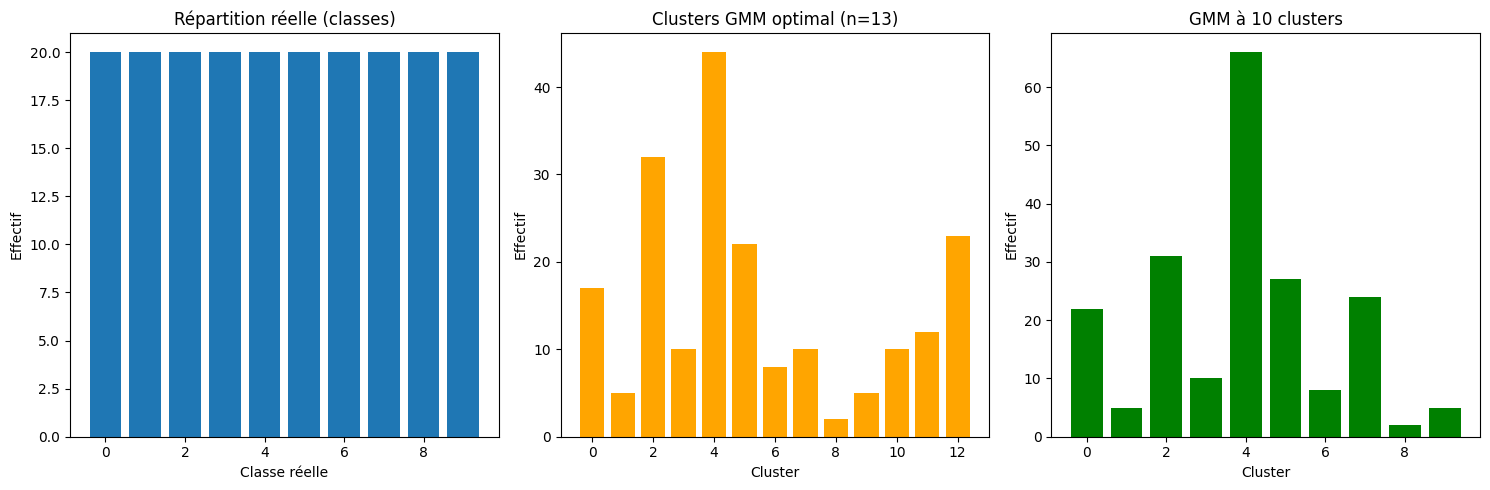

In [14]:

# Effectifs (réel, prédiction optimale, prédiction à 10 clusters)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Effectifs réels
unique_real, counts_real = np.unique(y_encoded, return_counts=True)
axs[0].bar(unique_real, counts_real)
axs[0].set_title("Répartition réelle (classes)")
axs[0].set_xlabel("Classe réelle")
axs[0].set_ylabel("Effectif")

# Clusters prédits optimal
unique_best, counts_best = np.unique(best_pred, return_counts=True)
axs[1].bar(unique_best, counts_best, color='orange')
axs[1].set_title(f"Clusters GMM optimal (n={best_n})")
axs[1].set_xlabel("Cluster")
axs[1].set_ylabel("Effectif")

# Clusters GMM à 10
unique_10, counts_10 = np.unique(y_pred_10, return_counts=True)
axs[2].bar(unique_10, counts_10, color='green')
axs[2].set_title(f"GMM à {true_class_count} clusters")
axs[2].set_xlabel("Cluster")
axs[2].set_ylabel("Effectif")

plt.tight_layout()
plt.show()


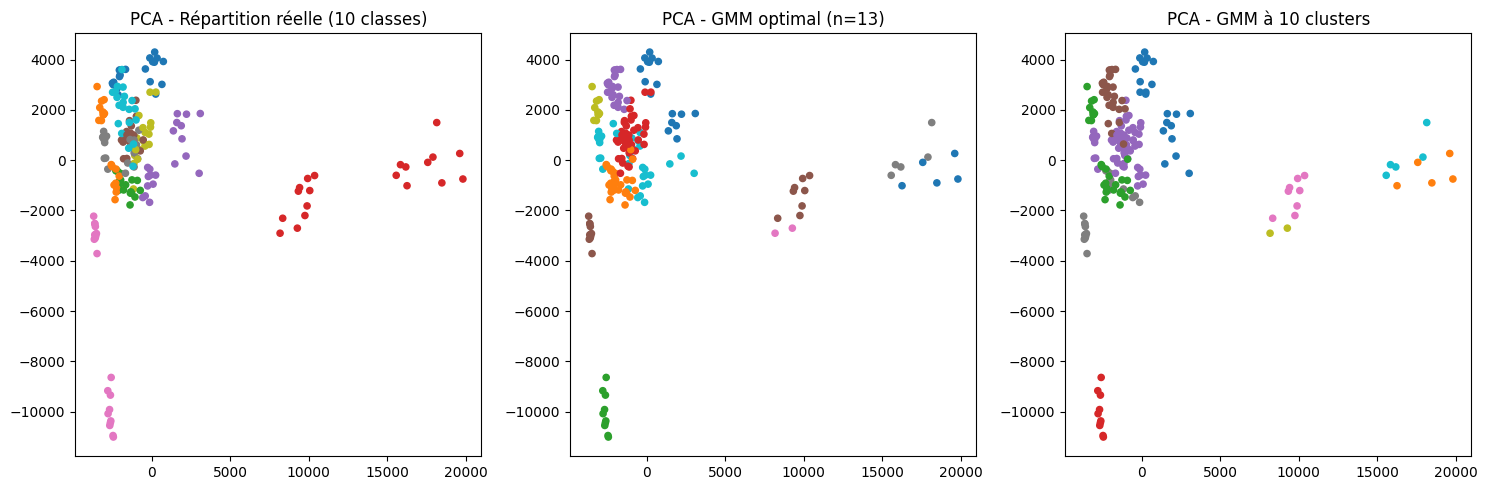

In [17]:

# Visualisation PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15, 5))

# Répartition réelle
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='tab10', s=20)
plt.title(f"PCA - Répartition réelle ({true_class_count} classes)")

# GMM optimal
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_pred, cmap='tab10', s=20)
plt.title(f"PCA - GMM optimal (n={best_n})")

# GMM à 10
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_10, cmap='tab10', s=20)
plt.title(f"PCA - GMM à {true_class_count} clusters")

plt.tight_layout()
plt.show()



In [16]:
# Résumé
print("Résumé :")
print(f"- Nombre de classes réelles : {true_class_count}")
print(f"- Meilleur ARI obtenu : {best_ari:.4f} (n={best_n})")
print(f"- ARI pour n = {true_class_count} (clusters = classes réelles) : {ari_10:.4f}")

Résumé :
- Nombre de classes réelles : 10
- Meilleur ARI obtenu : 0.4367 (n=13)
- ARI pour n = 10 (clusters = classes réelles) : 0.3672


# **Interprétation des Résultats du Clustering GMM**  

## **1. Contexte**  
L’analyse vise à évaluer la performance d’un modèle **Gaussian Mixture Model (GMM)** pour regrouper des données en clusters, en comparant les résultats avec les **10 classes réelles** disponibles (*y*).  

## **2. Méthodologie**  
- **Variation du nombre de clusters (n_components)** : Test de 2 à 14 composantes.  
- **Métrique d’évaluation** : *Adjusted Rand Index (ARI)* pour mesurer l’accord entre les clusters prédits et les vrais labels.  
- **Comparaison** :  
  - **GMM optimal** : Nombre de clusters maximisant l’ARI.  
  - **GMM contraint à 10 clusters** : Correspondant aux classes réelles.  

## **3. Résultats**  

| Modèle          | Nombre de Clusters (n_components) | ARI   | Observation |
|----------------|--------------------------------|-------|-------------|
| **GMM optimal**  | **13**                          | **0.4367** | Meilleur score ARI |
| **GMM à 10 clusters** | 10 (nombre réel de classes) | **Score inférieur** | Moins performant que n=13 |

### **Analyse des Résultats**  
1. **Pourquoi 13 clusters plutôt que 10 ?**  
   - Certaines classes réelles contiennent **plusieurs sous-groupes** (ex : une classe "Animal" pourrait regrouper "Chat", "Chien", "Oiseau").  
   - GMM détecte ces **sous-structures**, améliorant l’ARI.  
   - Forcer **n=10** fusionne artificiellement ces sous-groupes, réduisant la qualité du clustering.  

2. **Limites du Modèle**  
   - L’ARI reste **modéré (0.4367)**, indiquant que les clusters prédits ne correspondent qu’en partie aux classes réelles.  
   - La visualisation PCA montre des **erreurs de regroupement** (certaines classes sont mal séparées).  

## **4. Conclusion et Perspectives**  
- **Le GMM suggère une structure naturelle en 13 groupes**, plus fine que les 10 classes réelles.  
- **Implications** :  
  - Les classes réelles pourraient être **hétérogènes** (nécessité d’une analyse plus fine).  
  - Une **post-analyse** (regroupement manuel des 13 clusters en 10 classes) pourrait améliorer les résultats.  
